<div align=center>

<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
        Project - 3rd Phase
        <br />
        Image Colorization using Autoencoder
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = 99106255
            <br />
            Name = Alireza
            <br />
            Last_Name = Shokrani
        </div>
        <div class="column">
        <br />
            student_number = 99105901
            <br />
            Name = Amirhossein  
            <br />
            Last_Name = Akbari
        </div>
    </font>
    </div>


1. Download the "landscape image colorization" dataset and slice it to `train_set`, `validation_set` and `test_set`.
2. Design and train an AutoEncoder using `PyTorch` (not `TensorFlow`) on the dataset to colorize grayscale images
3. plot learning curve and visualize grayscale images of test set, their corresponding color images and their colorized versions side by side.

# Import Necessary Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os

In [2]:
# import shutil

# shutil.rmtree('/content/landscape Images')

# Load Dataset and Prepare It

In [3]:
! pip install kaggle
#--------------------
! mkdir ~/.kaggle
#--------------------
! cp kaggle.json ~/.kaggle/
#--------------------
! chmod 600 ~/.kaggle/kaggle.json
#--------------------
! kaggle datasets download theblackmamba31/landscape-image-colorization
#--------------------
! unzip /content/landscape-image-colorization.zip

Streaming output truncated to the last 5000 lines.
  inflating: landscape Images/gray/2914.jpg  
  inflating: landscape Images/gray/2915.jpg  
  inflating: landscape Images/gray/2916.jpg  
  inflating: landscape Images/gray/2917.jpg  
  inflating: landscape Images/gray/2918.jpg  
  inflating: landscape Images/gray/2919.jpg  
  inflating: landscape Images/gray/292.jpg  
  inflating: landscape Images/gray/2920.jpg  
  inflating: landscape Images/gray/2921.jpg  
  inflating: landscape Images/gray/2922.jpg  
  inflating: landscape Images/gray/2923.jpg  
  inflating: landscape Images/gray/2924.jpg  
  inflating: landscape Images/gray/2925.jpg  
  inflating: landscape Images/gray/2926.jpg  
  inflating: landscape Images/gray/2927.jpg  
  inflating: landscape Images/gray/2928.jpg  
  inflating: landscape Images/gray/2929.jpg  
  inflating: landscape Images/gray/293.jpg  
  inflating: landscape Images/gray/2930.jpg  
  inflating: landscape Images/gray/2931.jpg  
  inflating: landscape Images/g

In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the directory for the "landscape Images" folder
base_dir = '/content/landscape Images'

# Set the directories for the "color" and "gray" folders
color_dir = os.path.join(base_dir, 'color')
gray_dir = os.path.join(base_dir, 'gray')

# Create lists of the image filenames in the "color" and "gray" folders
color_images = os.listdir(color_dir)
gray_images = os.listdir(gray_dir)

# Split the data into training, validation, and test sets (60%, 20%, 20%)
train_color, test_color = train_test_split(color_images, test_size=0.2, random_state=1)
train_color, val_color = train_test_split(train_color, test_size=0.25, random_state=1)

train_gray, test_gray = train_test_split(gray_images, test_size=0.2, random_state=1)
train_gray, val_gray = train_test_split(train_gray, test_size=0.25, random_state=1)

# Create directories for the training, validation, and test sets
train_color_dir = os.path.join(base_dir, 'train', 'color')
val_color_dir = os.path.join(base_dir, 'val', 'color')
test_color_dir = os.path.join(base_dir, 'test', 'color')

train_gray_dir = os.path.join(base_dir, 'train', 'gray')
val_gray_dir = os.path.join(base_dir, 'val', 'gray')
test_gray_dir = os.path.join(base_dir, 'test', 'gray')


os.makedirs(train_color_dir)
os.makedirs(val_color_dir)
os.makedirs(test_color_dir)

os.makedirs(train_gray_dir)
os.makedirs(val_gray_dir)
os.makedirs(test_gray_dir)


# Copy the images to the appropriate directories
for image in train_color:
    src = os.path.join(color_dir, image)
    dst = os.path.join(train_color_dir, image)
    shutil.copyfile(src, dst)

for image in val_color:
    src = os.path.join(color_dir, image)
    dst = os.path.join(val_color_dir, image)
    shutil.copyfile(src, dst)

for image in test_color:
    src = os.path.join(color_dir, image)
    dst = os.path.join(test_color_dir, image)
    shutil.copyfile(src, dst)

for image in train_gray:
    src = os.path.join(gray_dir, image)
    dst = os.path.join(train_gray_dir, image)
    shutil.copyfile(src, dst)

for image in val_gray:
    src = os.path.join(gray_dir, image)
    dst = os.path.join(val_gray_dir, image)
    shutil.copyfile(src, dst)

for image in test_gray:
    src = os.path.join(gray_dir, image)
    dst = os.path.join(test_gray_dir, image)
    shutil.copyfile(src,dst)

In [5]:
from PIL import Image
from torch.utils.data import Dataset

class ColorizationDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.gray_dir = os.path.join(root_dir, "gray")
        self.color_dir = os.path.join(root_dir, "color")
        self.image_filenames = os.listdir(self.gray_dir)
        self.transform = transform

    def __getitem__(self, index):
        gray_path = os.path.join(self.gray_dir, self.image_filenames[index])
        color_path = os.path.join(self.color_dir, self.image_filenames[index])

        gray_image = Image.open(gray_path).convert("L")
        color_image = Image.open(color_path).convert("RGB")

        if self.transform:
            gray_image = self.transform(gray_image)
            color_image = self.transform(color_image)

        return gray_image, color_image

    def __len__(self):
        return len(self.image_filenames)



# Define transformations
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # Resize the images to a common size
    transforms.ToTensor()  # Convert images to tensors
])

# # Load the dataset
train_set = ColorizationDataset("/content/landscape Images/train", transform=transform)
validation_set = ColorizationDataset("/content/landscape Images/val", transform=transform)
test_set = ColorizationDataset("/content/landscape Images/test", transform=transform)

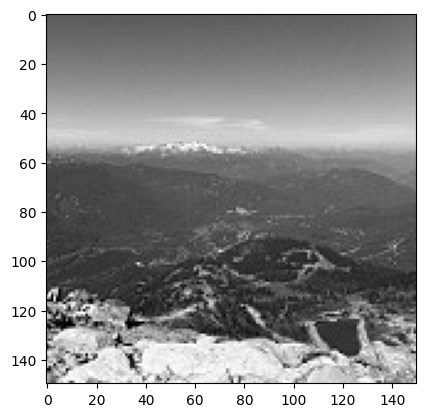

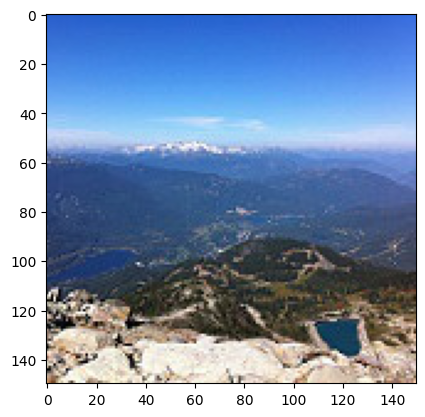

In [6]:
plt.imshow(train_set[0][0].permute(1, 2, 0), cmap='gray')
plt.show()
plt.imshow(train_set[0][1].permute(1, 2, 0), cmap='gray')
plt.show()

# Define Your Model

In [7]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=2),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


# Fit The Model

Also Define optimizer, Criterion and other parameters

In [8]:
# Define hyperparameters
learning_rate = 0.001
batch_size = 64
num_epochs = 50

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model and move it to GPU
model = AutoEncoder().to(device)

# Define optimizer and criterion
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=False)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=batch_size)

# Train the model
for epoch in range(num_epochs):
    model.train()
    for samples, targets in train_loader:
        # Move images to GPU
        samples = samples.to(device)
        targets = targets.to(device)
        # Forward pass
        outputs = model(samples)
        # Compute loss
        loss = criterion(outputs, targets)
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validate the model
    model.eval()
    with torch.no_grad():
        total_loss = 0.0
        for samples, targets in validation_loader:
            # Move images to GPU
            samples = samples.to(device)
            targets = targets.to(device)
            outputs = model(samples)
            loss = criterion(outputs, targets)
            total_loss += loss.item()

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {total_loss/len(validation_loader)}")

Epoch [1/50], Validation Loss: 0.017256171159122303
Epoch [2/50], Validation Loss: 0.013524150556844214
Epoch [3/50], Validation Loss: 0.011643847774552263
Epoch [4/50], Validation Loss: 0.010390116590196672
Epoch [5/50], Validation Loss: 0.009414036393813465
Epoch [6/50], Validation Loss: 0.00897079564469016
Epoch [7/50], Validation Loss: 0.008412414453113857
Epoch [8/50], Validation Loss: 0.00807856217674587
Epoch [9/50], Validation Loss: 0.007647333747666815
Epoch [10/50], Validation Loss: 0.007352990928389456
Epoch [11/50], Validation Loss: 0.007137522911248
Epoch [12/50], Validation Loss: 0.006964574790681186
Epoch [13/50], Validation Loss: 0.006814805021428544
Epoch [14/50], Validation Loss: 0.006686318665742874
Epoch [15/50], Validation Loss: 0.006563543028238675
Epoch [16/50], Validation Loss: 0.006468388110237277
Epoch [17/50], Validation Loss: 0.006402483655382757
Epoch [18/50], Validation Loss: 0.006353374013839209
Epoch [19/50], Validation Loss: 0.00629302448309634
Epoch [2

# Plot The Results

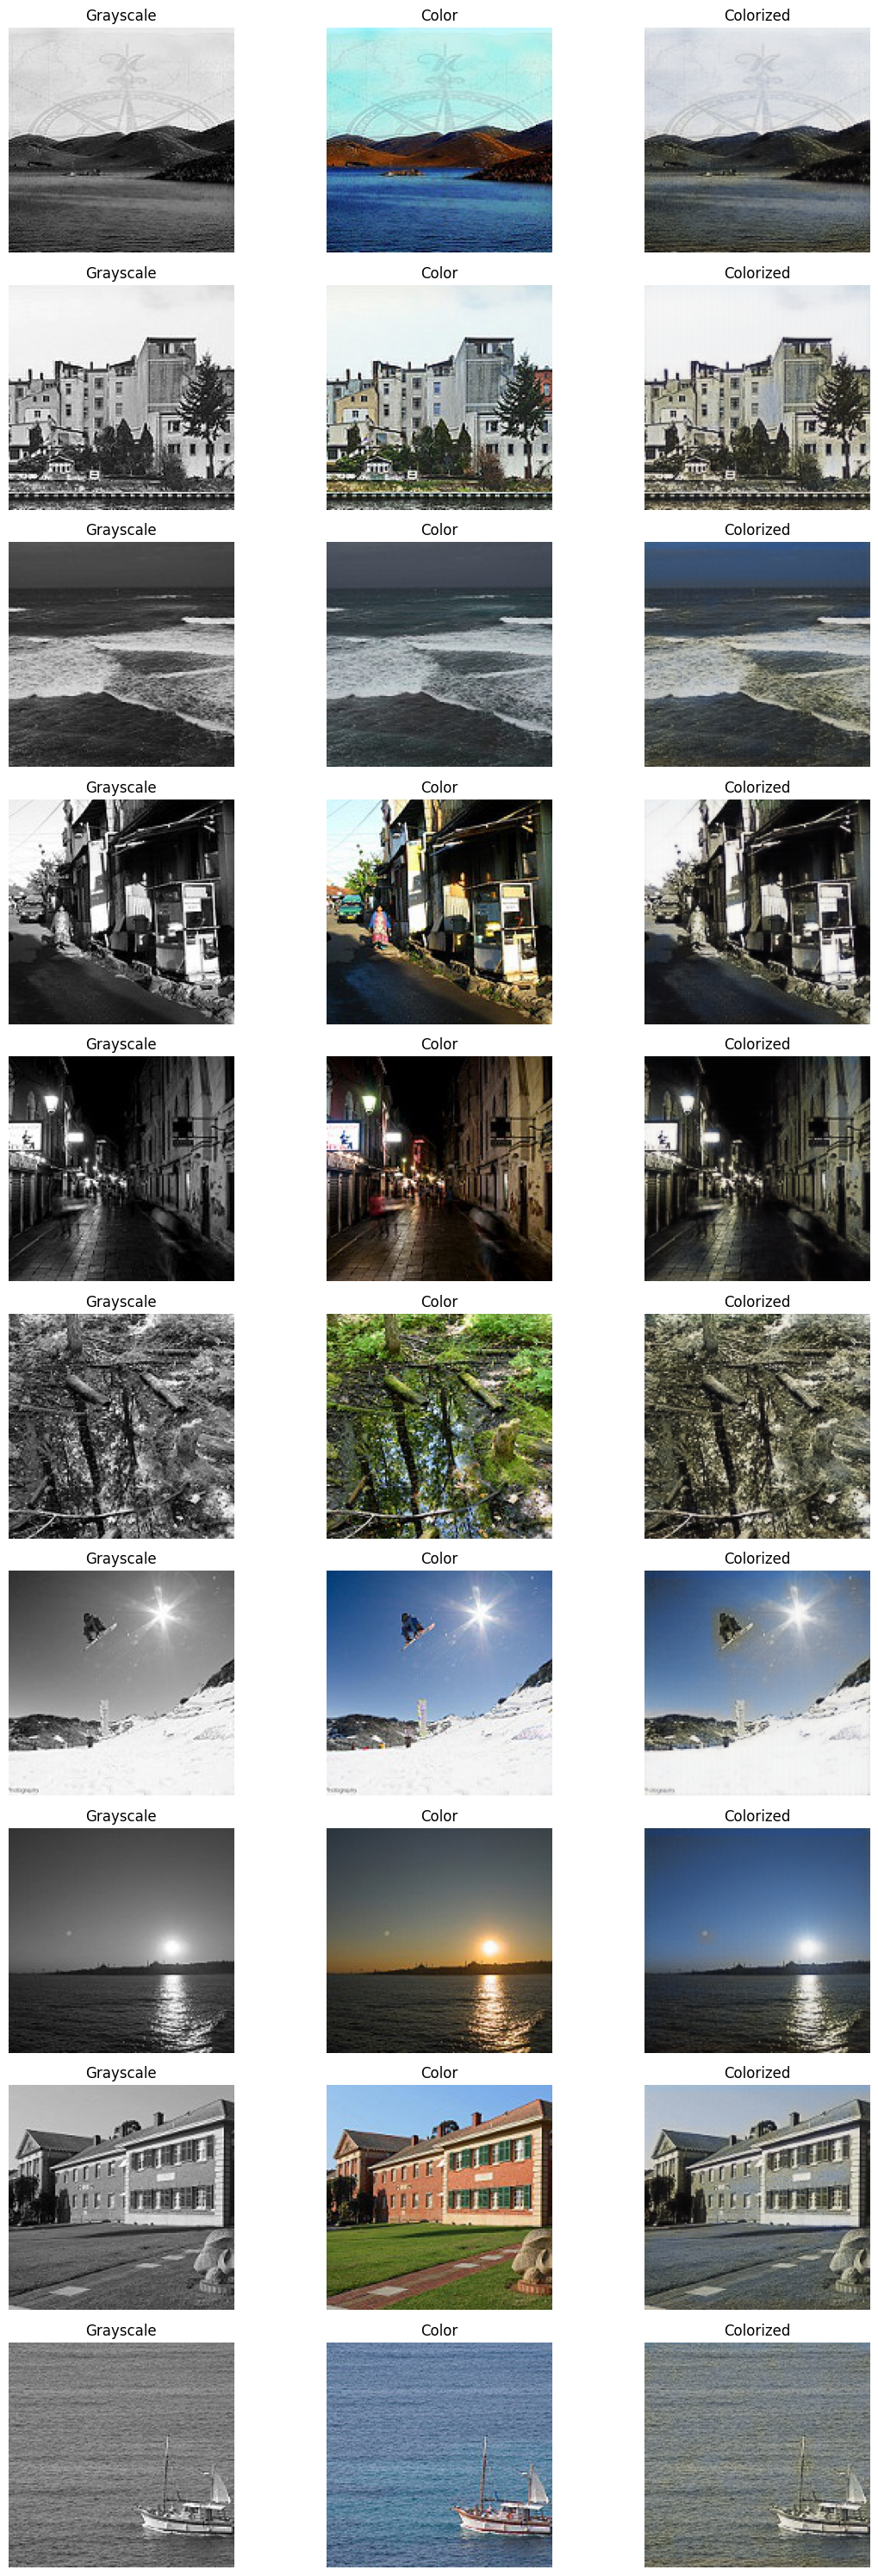

In [9]:
# Visualize grayscale images, their corresponding color images, and colorized versions
model.eval()
test_loader = torch.utils.data.DataLoader(test_set, batch_size=10)
itr = iter(test_loader)
samples, targets = next(itr)
samples, targets = next(itr)
samples, targets = next(itr)

with torch.no_grad():
    colorized_images = model(samples.to(device))
    colorized_images = colorized_images.to("cpu")

fig, axes = plt.subplots(10, 3, figsize=(12, 30))

for i in range(10):
    axes[i, 0].imshow(samples[i].permute(1, 2, 0), cmap='gray')
    axes[i, 0].axis("off")
    axes[i, 0].set_title("Grayscale")

    axes[i, 1].imshow(targets[i].permute(1, 2, 0), cmap='gray')
    axes[i, 1].axis("off")
    axes[i, 1].set_title("Color")

    axes[i, 2].imshow(colorized_images[i].permute(1, 2, 0), cmap='gray')
    axes[i, 2].axis("off")
    axes[i, 2].set_title("Colorized")

plt.tight_layout()
plt.show()
